In [4]:
import sys, os
pardir = os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir))
sys.path.append(pardir)

import numpy as np
import librosa
import librosa.display
from scipy.io import wavfile
from aubio import onset
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
import dsp
import configobj
from validate import Validator

from read_labels import read_labels

%matplotlib inline

In [5]:
rootdir = '/home/tracek/Data/Birdman/'
filename = os.path.join(rootdir, 'raw/STHELENA-02_20140605_200000_1.wav')
outdir = os.path.join(rootdir, 'raw/samples/')
sheets = read_labels('/home/tracek/Data/Birdman/labels/sthelena_labels.xls')
filename_noext = os.path.splitext(os.path.basename(filename))[0]

# in seconds [s]
signal_start_s = 0
signal_end_s = 95

sheet = sheets[filename_noext]
condition = (sheet['Time Start'] > signal_start_s) & (sheet['Time End'] < signal_end_s)
sheet_selected = sheet[condition]

nfft = 256 # samples
hop = nfft // 2

/home/tracek/.virtualenvs/ml/lib/python3.5/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [6]:
y, sr = librosa.load(filename, sr=None)
y = y[signal_start_s * sr: signal_end_s * sr]
S = np.abs(librosa.stft(y, n_fft=nfft, hop_length=hop))
D = librosa.amplitude_to_db(S)
D.shape

(129, 11876)

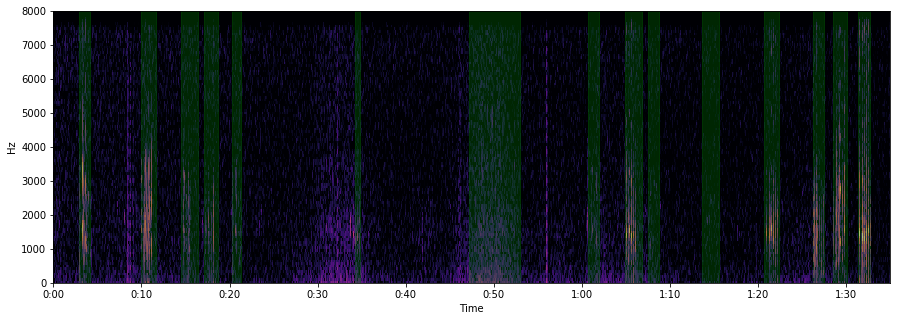

In [7]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

librosa.display.specshow(D[25:,:], sr=sr, hop_length=hop, y_axis='linear', x_axis='time')

for index, row in sheet_selected.iterrows():
    if row['Species'] == 'Storm Petrel':
        ax.axvspan(xmin=row['Time Start'], xmax=row['Time End'], color='green', alpha=0.3)
    else:
        ax.axvspan(xmin=row['Time Start'], xmax=row['Time End'], color='white', alpha=0.3)

In [10]:
yh = dsp.highpass_filter(y, sr, highcut=500)

In [11]:
oenv = librosa.onset.onset_strength(y=yh, sr=sr, aggregate=np.median, fmax=4000, n_mels=100, lag=5)

In [12]:
ons = librosa.onset.onset_detect(onset_envelope=oenv, sr=sr, hop_length=hop, backtrack=False, units='samples')

In [13]:
ons_back = librosa.onset.onset_detect(onset_envelope=oenv, sr=sr, hop_length=hop, backtrack=True, units='samples')

In [14]:
len(ons)

56

In [18]:
config = configobj.ConfigObj(pardir + '/config.ini', configspec=pardir + '/configspec.ini')
validation_successful = config.validate(Validator())

onsets_forward = dsp.get_onsets_config(yh, sr, config)
onsets_backward = dsp.get_onsets_config(yh[::-1], sr, config)

In [19]:
len(onsets_forward)

58

In [20]:
len(onsets_backward)

58

In [21]:
onsets_backward_reversed = [signal_end_s - onset for onset in onsets_backward]

In [22]:
onsets_forward

[2.963249921798706,
 3.34012508392334,
 3.7916250228881836,
 8.123687744140625,
 8.454000473022461,
 8.827249526977539,
 9.992812156677246,
 10.357687950134277,
 10.763562202453613,
 11.162625312805176,
 14.634312629699707,
 15.103750228881836,
 15.483875274658203,
 16.956249237060547,
 17.320999145507812,
 17.647811889648438,
 17.968936920166016,
 20.328937530517578,
 20.638063430786133,
 23.1560001373291,
 30.650312423706055,
 31.048500061035156,
 32.215126037597656,
 33.756126403808594,
 34.12206268310547,
 34.55556106567383,
 41.91318893432617,
 46.010189056396484,
 47.75606155395508,
 48.119998931884766,
 48.503936767578125,
 48.878936767578125,
 49.32406234741211,
 52.368438720703125,
 55.991249084472656,
 60.6609992980957,
 61.05125045776367,
 61.487937927246094,
 65.02725219726562,
 65.34674835205078,
 65.6578140258789,
 66.0806884765625,
 79.7744369506836,
 80.96031188964844,
 81.33712768554688,
 81.76981353759766,
 82.20555877685547,
 86.35894012451172,
 86.74687194824219,
 8

In [23]:
onsets_backward_reversed[::-1]

[3.0865020751953125,
 3.5233154296875,
 3.9028091430664062,
 4.345939636230469,
 8.483253479003906,
 8.799125671386719,
 9.127433776855469,
 10.122627258300781,
 10.498313903808594,
 10.851936340332031,
 11.247062683105469,
 14.827621459960938,
 15.208625793457031,
 15.5963134765625,
 17.482559204101562,
 17.857315063476562,
 18.24449920654297,
 20.751190185546875,
 21.099563598632812,
 23.204002380371094,
 30.52387237548828,
 31.500873565673828,
 32.38218688964844,
 33.7911262512207,
 34.448123931884766,
 34.87206268310547,
 41.952186584472656,
 46.23249816894531,
 47.78581237792969,
 48.14381408691406,
 48.5338134765625,
 48.912437438964844,
 49.35262680053711,
 50.72193908691406,
 52.26262664794922,
 56.15131378173828,
 60.69337463378906,
 61.32006072998047,
 61.714874267578125,
 65.35675048828125,
 65.75268745422363,
 66.13199996948242,
 79.93037509918213,
 81.02287483215332,
 81.43281269073486,
 81.86124992370605,
 82.3024377822876,
 86.66874980926514,
 87.06825017929077,
 87.5054